# Credit Card Fraud Detection and Prediction Using Deep Learning 
@ This tutorial demonstrates how to use unsupervised training for Credit Card Fraud Detection and Prediction. The main model implemented here is auto-encoder, which achives 0.95 of AUC on test set. 


# Load libraries 

In [1]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import os
from datetime import datetime 
from sklearn.metrics import roc_auc_score as auc 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Data Exploration

In [2]:
data_fd = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [3]:
data_fd.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Credit Card Fraud Detection data -  rows:",data_fd.shape[0]," columns:", data_fd.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [5]:
data_fd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print("Total transaction time span: {:.1f} days".format(data_fd['Time'].max() / (3600 * 24.0)))
print("With {:.3f} % of transactions are fraud. ".format(np.sum(data_fd['Class']) / data_fd.shape[0] * 100))

Total transaction time span: 2.0 days
With 0.173 % of transactions are fraud. 


## Check for missing data 

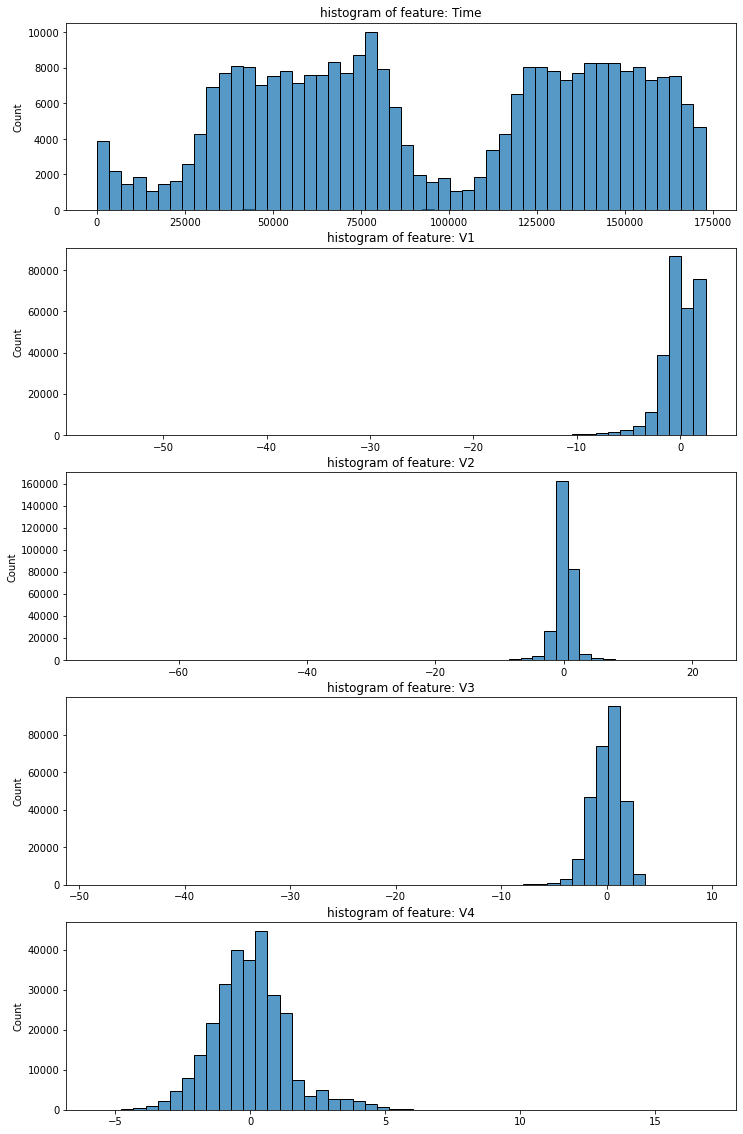

In [7]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, cn in enumerate(data_fd.columns[:5]):
    ax = plt.subplot(gs[i])
    sns.histplot(data_fd[cn][data_fd.Class == 1], bins=50)
    sns.histplot(data_fd[cn][data_fd.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

## Train and test split on time series, using first 75% as training/val, and last 25% as test

In [8]:
TEST_RATIO = 0.25
data_fd.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * data_fd.shape[0])
train_x = data_fd.iloc[:TRA_INDEX, 1:-2].values
train_y = data_fd.iloc[:TRA_INDEX, -1].values

test_x = data_fd.iloc[TRA_INDEX:, 1:-2].values
test_y = data_fd.iloc[TRA_INDEX:, -1].values

In [9]:
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))

Total train examples: 213605, total fraud cases: 398, equal to 0.00186 of total cases. 


In [10]:
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))

Total test examples: 71202, total fraud cases: 94, equal to 0.00132 of total cases. 


## Feature Normalization - min max score (used for sigmoid activation)

In [11]:
cols_max = []
cols_min = []
for c in range(train_x.shape[1]):
    cols_max.append(train_x[:,c].max())
    cols_min.append(train_x[:,c].min())
    train_x[:, c] = (train_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
    test_x[:, c] =  (test_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])

## Feature Normalization - z score (for tanh activation)

In [12]:
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] =  (test_x[:, c] - cols_mean[-1]) / cols_std[-1]

# Modelling and results


## Auto-encoder as unsupervised learning

### Parameters

In [13]:
# Parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 256
display_step = 1

# Network Parameters
n_hidden_1 = 15 # 1st layer num features
#n_hidden_2 = 15 # 2nd layer num features
n_input = train_x.shape[1] # MNIST data input (img shape: 28*28)
data_dir = '.'

### Train and vallidate the model - (1 hidden layer turned out to be enough)

In [14]:
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    #'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   #biases['encoder_b2']))
    return layer_1


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                  # biases['decoder_b2']))
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define batch mse
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# TRAIN StARTS
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)
    

Epoch: 0001 cost= 1.002575278 Train auc= 0.952616 Time elapsed= 0:00:01.302021
Epoch: 0002 cost= 0.718847930 Train auc= 0.955995 Time elapsed= 0:00:02.443930
Epoch: 0003 cost= 0.570887566 Train auc= 0.957240 Time elapsed= 0:00:03.532609
Epoch: 0004 cost= 0.553723037 Train auc= 0.959331 Time elapsed= 0:00:04.586958
Epoch: 0005 cost= 0.407119215 Train auc= 0.960408 Time elapsed= 0:00:05.777179
Epoch: 0006 cost= 0.537008941 Train auc= 0.959182 Time elapsed= 0:00:06.834318
Epoch: 0007 cost= 0.425235599 Train auc= 0.957403 Time elapsed= 0:00:07.916793
Epoch: 0008 cost= 0.416928828 Train auc= 0.956462 Time elapsed= 0:00:08.971136
Epoch: 0009 cost= 0.311899960 Train auc= 0.955963 Time elapsed= 0:00:10.053776
Epoch: 0010 cost= 0.401393861 Train auc= 0.955418 Time elapsed= 0:00:11.085288
Optimization Finished!
Model saved in file: ./temp_saved_model_1layer.ckpt


### Test model - on later 25% test data

In [15]:
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    
    saver.restore(sess, save_model)
    
    test_batch_mse = sess.run(batch_mse, feed_dict={X: test_x})
    
    print("Test auc score: {:.6f}".format(auc(test_y, test_batch_mse)))
    

Test auc score: 0.943198


### Visualize the prediction

#### Display fraud score (mse) distribution for non-fraud cases

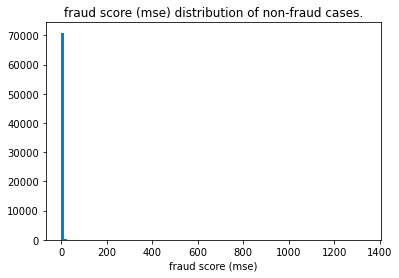

In [16]:
plt.hist(test_batch_mse[test_y == 0.0], bins = 100)
plt.title("fraud score (mse) distribution of non-fraud cases.")
plt.xlabel("fraud score (mse)")
plt.show()

#### Zoom into (0, 20) range

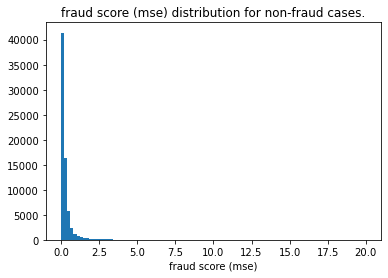

In [17]:
plt.hist(test_batch_mse[(test_y == 0.0) & (test_batch_mse < 20)], bins = 100)
plt.title("fraud score (mse) distribution for non-fraud cases.")
plt.xlabel("fraud score (mse)")
plt.show()

#### Display fraud score (mse) distribution for fraud cases

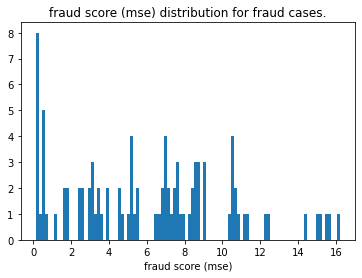

In [18]:
plt.hist(test_batch_mse[test_y == 1.0], bins = 100)
plt.title("fraud score (mse) distribution for fraud cases.")
plt.xlabel("fraud score (mse)")
plt.show()

In [19]:
THRE_TEST = 7
print("Let's, for example, use 7 as our detection threshold: \n\
Number of detected cases above treshold: {}, \n\
Number of pos cases only above threshold: {}, \n\
The percentage of accuracy above treshold (Precision): {:0.2f}%. \n\
Compared to the average percentage of fraud in test set: 0.132%".format( \
np.sum(test_batch_mse > THRE_TEST), \
np.sum(test_y[test_batch_mse > THRE_TEST]), \
np.sum(test_y[test_batch_mse > THRE_TEST]) / np.sum(test_batch_mse > THRE_TEST) * 100))
      

Let's, for example, use 7 as our detection threshold: 
Number of detected cases above treshold: 542, 
Number of pos cases only above threshold: 41, 
The percentage of accuracy above treshold (Precision): 7.56%. 
Compared to the average percentage of fraud in test set: 0.132%


##### Observation: Our precision increased by a factor of 60 from 0.132% to 7.50%; However, the detection precision is still low (below 8%), but this is mainly due to the overall percentage of fraud cases is really too low. 

## Build a binary classifier that predicts fraud, using the auto-encoder embedding layers as model inputs. 

### Get auto-encoder embedding (the `encoder_op` tensor) for both train and test data

In [20]:
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    saver.restore(sess, save_model)
    
    test_encoding = sess.run(encoder_op, feed_dict={X: test_x})
    train_encoding = sess.run(encoder_op, feed_dict={X: train_x})
    
    print("Dim for test_encoding and train_encoding are: \n", test_encoding.shape, '\n', train_encoding.shape)

Dim for test_encoding and train_encoding are: 
 (71202, 15) 
 (213605, 15)


### Build the graph for FC layers (best hidden size based on validation is found to be 4)

In [21]:
#n_input = test_encoding.shape[1]
n_input = test_encoding.shape[1]

hidden_size = 4
output_size = 2

X = tf.placeholder(tf.float32, [None, n_input], name='input_x')
y_ = tf.placeholder(tf.int32, shape=[None, output_size], name='target_y')

weights = {
    'W1': tf.Variable(tf.truncated_normal([n_input, hidden_size])),
    'W2': tf.Variable(tf.truncated_normal([hidden_size, output_size])),
}
biases = {
    'b1': tf.Variable(tf.zeros([hidden_size])),
    'b2': tf.Variable(tf.zeros([output_size])),
}

hidden_layer =  tf.nn.relu(tf.add(tf.matmul(X, weights['W1']), biases['b1']))
pred_logits = tf.add(tf.matmul(hidden_layer, weights['W2']), biases['b2'])
pred_probs = tf.nn.softmax(pred_logits)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=pred_logits))

optimizer = tf.train.AdamOptimizer(2e-4).minimize(cross_entropy)


### Prepare the data set. 
##### Now we need to re-split the train into train/val, due to supervised training.
##### We will therefore use 80% of out previous training data as our new training, and the remaining 20% as new validation. (train : val : test = (0.75x0.8) : (0.75x0.2) : (0.25x1.0)). 


### Finally we start to train our binary classifier

In [22]:
n_epochs = 80
batch_size = 256

# PREPARE DATA
VAL_PERC = 0.2
all_y_bin = np.zeros((data_fd.shape[0], 2))
all_y_bin[range(data_fd.shape[0]), data_fd['Class'].values] = 1

train_enc_x = train_encoding[:int(train_encoding.shape[0] * (1-VAL_PERC))]
train_enc_y = all_y_bin[:int(train_encoding.shape[0] * (1-VAL_PERC))]

val_enc_x = train_encoding[int(train_encoding.shape[0] * (1-VAL_PERC)):]
val_enc_y = all_y_bin[int(train_encoding.shape[0] * (1-VAL_PERC)):train_encoding.shape[0]]

test_enc_y = all_y_bin[train_encoding.shape[0]:]
print("Num of data for train, val and test are: \n{}, \n{}, \n{}".format(train_enc_x.shape[0], val_enc_x.shape[0], \
                                                                        test_encoding.shape[0]))

# TRAIN STARTS
save_model = os.path.join(data_dir, 'temp_saved_model_FCLayers.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_enc_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(n_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_enc_x.shape[0], batch_size)
            batch_xs = train_enc_x[batch_idx]
            batch_ys = train_enc_y[batch_idx]

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cross_entropy], feed_dict={X: batch_xs, y_: batch_ys})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_probs = sess.run(pred_probs, feed_dict={X: val_enc_x})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Val auc=", "{:.6f}".format(auc(val_enc_y[:, 1], val_probs[:, 1])), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)
    

Num of data for train, val and test are: 
170884, 
42721, 
71202
Epoch: 0001 cost= 0.599021196 Val auc= 0.308511 Time elapsed= 0:00:00.751678
Epoch: 0002 cost= 0.217789769 Val auc= 0.299391 Time elapsed= 0:00:01.384499
Epoch: 0003 cost= 0.114438862 Val auc= 0.312596 Time elapsed= 0:00:02.014132
Epoch: 0004 cost= 0.090003274 Val auc= 0.341918 Time elapsed= 0:00:02.630570
Epoch: 0005 cost= 0.068462260 Val auc= 0.404587 Time elapsed= 0:00:03.268426
Epoch: 0006 cost= 0.029220082 Val auc= 0.531762 Time elapsed= 0:00:03.886203
Epoch: 0007 cost= 0.019283839 Val auc= 0.759162 Time elapsed= 0:00:04.517367
Epoch: 0008 cost= 0.042986579 Val auc= 0.889862 Time elapsed= 0:00:05.145177
Epoch: 0009 cost= 0.022510450 Val auc= 0.912399 Time elapsed= 0:00:05.754765
Epoch: 0010 cost= 0.005574288 Val auc= 0.914149 Time elapsed= 0:00:06.355348
Epoch: 0011 cost= 0.006631509 Val auc= 0.916308 Time elapsed= 0:00:06.971480
Epoch: 0012 cost= 0.003368445 Val auc= 0.920312 Time elapsed= 0:00:07.576061
Epoch: 0013

#### Test the model on the same test data as before - improved on AUC slightly - 0.9669

In [23]:
save_model = os.path.join(data_dir, 'temp_saved_model_FCLayers.ckpt')
saver = tf.train.Saver()
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    
    saver.restore(sess, save_model)
    
    test_probs = sess.run(pred_probs, feed_dict={X: test_encoding})
    
    print("\nTest auc score: {}".format(auc(test_enc_y[:, 1], test_probs[:, 1])))


Test auc score: 0.9424404920773795


## However, let's test a simple supervisied neural network (two layers FC) from scratch - without using auto-encoder

### Build graph - 28 (input) -> 8 -> 4 -> 2

In [24]:
n_epochs = 200
batch_size = 256

#n_input = test_encoding.shape[1]
n_input = train_x.shape[1]

hidden1_size = 8
hidden2_size = 4
output_size = 2

X = tf.placeholder(tf.float32, [None, n_input], name='input_x')
y_ = tf.placeholder(tf.int32, shape=[None, output_size], name='target_y')

weights = {
    'W1': tf.Variable(tf.truncated_normal([n_input, hidden1_size])),
    'W2': tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size])),
    'W3': tf.Variable(tf.truncated_normal([hidden2_size, output_size])),
}
biases = {
    'b1': tf.Variable(tf.zeros([hidden1_size])),
    'b2': tf.Variable(tf.zeros([hidden2_size])),
    'b3': tf.Variable(tf.zeros([output_size])),
}

hidden1_layer =  tf.nn.relu(tf.add(tf.matmul(X, weights['W1']), biases['b1']))
hidden2_layer =  tf.nn.relu(tf.add(tf.matmul(hidden1_layer, weights['W2']), biases['b2']))
pred_logits = tf.add(tf.matmul(hidden2_layer, weights['W3']), biases['b3'])
pred_probs = tf.nn.softmax(pred_logits)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=pred_logits))

optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


### Prepare the data set. Now we need to re-split the train into train/val. 


#### Again, we will use 80% of out previous training data as our new training, and the remaining 20% as new validation. (train : val : test = (0.75x0.8) : (0.75x0.2) : (0.25x1.0)).


In [25]:
# PREPARE DATA
VAL_PERC = 0.2
all_y_bin = np.zeros((data_fd.shape[0], 2))
all_y_bin[range(data_fd.shape[0]), data_fd['Class'].values] = 1

train_enc_x = train_x[:int(train_x.shape[0] * (1-VAL_PERC))]
train_enc_y = all_y_bin[:int(train_x.shape[0] * (1-VAL_PERC))]

val_enc_x = train_x[int(train_encoding.shape[0] *  (1-VAL_PERC)):]
val_enc_y = all_y_bin[int(train_encoding.shape[0] * (1-VAL_PERC)):train_x.shape[0]]

test_enc_y = all_y_bin[train_x.shape[0]:]

print("Num of data for train, val and test are: \n{}, \n{}, \n{}".format(train_enc_x.shape[0], val_enc_x.shape[0], \
                                                                        test_encoding.shape[0]))
# TRAIN STARTS
save_model = os.path.join(data_dir, 'temp_saved_model_FCNNets_raw.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_enc_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(n_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_enc_x.shape[0], batch_size)
            batch_xs = train_enc_x[batch_idx]
            batch_ys = train_enc_y[batch_idx]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cross_entropy], feed_dict={X: batch_xs, y_: batch_ys})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_probs = sess.run(pred_probs, feed_dict={X: val_enc_x})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Val auc=", "{:.6f}".format(auc(val_enc_y[:, 1], val_probs[:, 1])), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)
    

Num of data for train, val and test are: 
170884, 
42721, 
71202
Epoch: 0001 cost= 0.107704982 Val auc= 0.109022 Time elapsed= 0:00:00.855504
Epoch: 0002 cost= 0.088459894 Val auc= 0.148253 Time elapsed= 0:00:01.581910
Epoch: 0003 cost= 0.128286242 Val auc= 0.218560 Time elapsed= 0:00:02.335761
Epoch: 0004 cost= 0.039115231 Val auc= 0.298514 Time elapsed= 0:00:03.063686
Epoch: 0005 cost= 0.026437176 Val auc= 0.361262 Time elapsed= 0:00:03.796041
Epoch: 0006 cost= 0.018195704 Val auc= 0.426886 Time elapsed= 0:00:04.494154
Epoch: 0007 cost= 0.114076987 Val auc= 0.475222 Time elapsed= 0:00:05.196947
Epoch: 0008 cost= 0.086911470 Val auc= 0.513914 Time elapsed= 0:00:05.898507
Epoch: 0009 cost= 0.118888237 Val auc= 0.553330 Time elapsed= 0:00:06.618444
Epoch: 0010 cost= 0.004470904 Val auc= 0.582669 Time elapsed= 0:00:07.431580
Epoch: 0011 cost= 0.010123285 Val auc= 0.619083 Time elapsed= 0:00:08.155029
Epoch: 0012 cost= 0.111790366 Val auc= 0.655844 Time elapsed= 0:00:08.861937
Epoch: 0013

### Predict on test data

In [26]:
save_model = os.path.join(data_dir, 'temp_saved_model_FCNNets_raw.ckpt')
saver = tf.train.Saver()
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    
    saver.restore(sess, save_model)
    
    test_probs = sess.run(pred_probs, feed_dict={X: test_x})
    
    print("Test auc score: {}".format(auc(test_enc_y[:, 1], test_probs[:, 1])))

Test auc score: 0.9446959015893115
